# Үй жұмысы: Сызықтық Регрессия және Регуляризация

**Тақырыбы:** Үй бағасын болжау моделін құру.

**Мақсаты:**
Бұл үй жұмысында сіз МО-дағы ең маңызды қадамдарды жасайсыз:
1.  **Деректерді бөлу (Train/Test Split):** Неге біз деректердің бір бөлігін "жасырып" қаламыз?
2.  **Сызықтық регрессия (Linear Regression):** Қарапайым модель құру.
3.  **Артық үйрену (Overfitting):** Модель тым "ақылды" болып кеткенде не болады?
4.  **Ridge Регрессия:** Артық үйренуді қалай жөндейміз?



**Нұсқаулық:**
Код ұяшықтарында `# TODO` деп жазылған жерлерге қажетті кодты жазып, ұяшықты іске қосыңыз (Run).






## 1. Кітапханаларды және Деректерді жүктеу

Алдымен жұмысқа қажетті кітапханаларды жүктейік. Біз жасанды түрде **үйдің ауданы** мен **бағасы** арасындағы байланысты көрсететін деректер жинағын құрамыз.


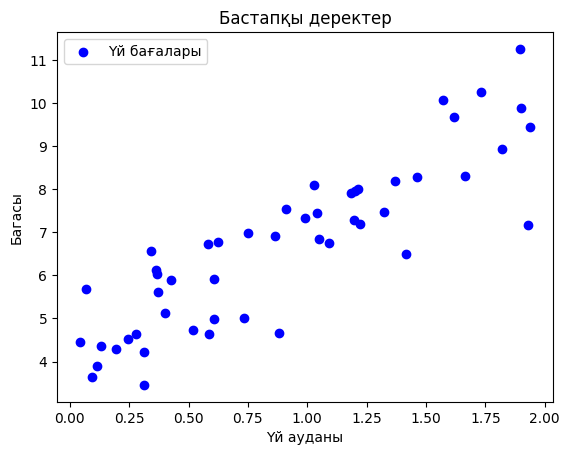

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


# Жасанды деректер
np.random.seed(42)
# Үй ауданы (X)
X = 2 * np.random.rand(50, 1)
# Үй бағасы (y) = 4 + 3 * аудан + кездейсоқ шу
y = 4 + 3 * X + np.random.randn(50, 1)

# Деректерді көрсету
plt.scatter(X, y, color='blue', label='Үй бағалары')
plt.xlabel("Үй ауданы")
plt.ylabel("Багасы")
plt.title("Бастапқы деректер")
plt.legend()
plt.show()

## 2. Деректерді бөлу (Train/Test Split)

**Теория:**
Модельдің сапасын тексеру үшін біз деректерді екіге бөлуіміз керек:
1.  **Train (Үйрету жинағы - 80%):** Модель осы деректерді көріп, заңдылықты үйренеді.
2.  **Test (Тексеру жинағы - 20%):** Модель бұл деректерді ешқашан көрмеген. Біз оның "емтихан" тапсыру қабілетін осы арқылы тексереміз.

**Тапсырма:**
`train_test_split` функциясын қолданып, деректерді бөліңіз. `test_size=0.2` (яғни 20%) және `random_state=42` деп алыңыз.


In [3]:
# TODO: Деректерді X_train, X_test, y_train, y_test айнымалыларына бөліңіз
# Көмек: train_test_split(X, y, test_size=..., random_state=...)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Нәтижені тексеру (кодты өзгертпеңіз)
try:
    print(f"Train көлемі:{X_train.shape}")
    print(f"Test көлемі: {X_test.shape}")
except NameError:
    print("Қате: Айнымалылар дұрыс құрылмады!")

Train көлемі:(40, 1)
Test көлемі: (10, 1)


## 3. Сызықтық Регрессия (Linear Regression)

**Теория:**
Сызықтық регрессия деректерге ең жақын келетін түзу сызықты іздейді.
Формуласы:
$$y = w \cdot x + b$$
Мұндағы $w$ — салмақ (еңістік), $b$ — ауытқу. Модельдің мақсаты — **MSE (Орташа квадраттық қателікті)** азайту.

**Тапсырма:**
1.  `LinearRegression` моделін құрыңыз.
2.  Модельді `X_train` және `y_train` деректерінде үйретіңіз (`fit`).
3.  `X_test` деректеріне болжам жасаңыз (`predict`).


MSE (Қателік): 0.80
R2 Score (Дәлдік): 0.70


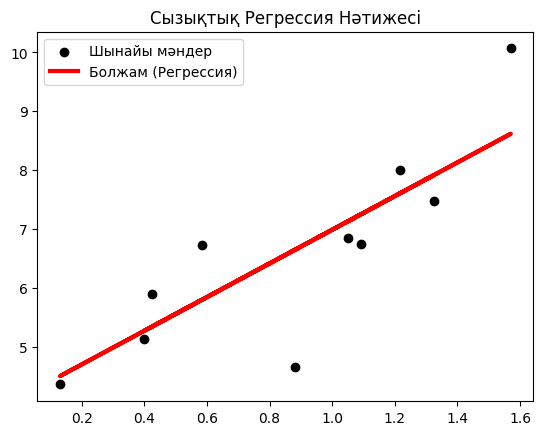

In [10]:
# 1. Модельді құру
# TODO: model = ...
model = LinearRegression()

# 2. Модельді үйрету (fit)
model.fit(X_train, y_train)

# 3. Болжам жасау (predict)
# TODO: y_pred = ...
#y_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Нәтижені бағалау (Мұны өзгертпеңіз)
mse = mean_squared_error(y_test, y_pred) # Егер қате шықса, y_pred айнымалысы бар екеніне көз жеткізіңіз
r2 = r2_score(y_test, y_pred)

print(f"MSE (Қателік): {mse:.2f}")
print(f"R2 Score (Дәлдік): {r2:.2f}")

# Графикте көрсету
plt.scatter(X_test, y_test, color='black', label='Шынайы мәндер')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Болжам (Регрессия)')
plt.legend()
plt.title("Сызықтық Регрессия Нәтижесі")
plt.show()

## 4. Артық үйрену (Overfitting) және Полиномдар

**Теория:**
Кейде деректер күрделірек болады. Егер біз модельге тым көп еркіндік берсек (мысалы, $x^2, x^3, ..., x^{10}$ дәрежелерін қоссақ), модель негізгі заңдылықты емес, кездейсоқ "шуды" да жаттап алады. Бұны **Overfitting** дейміз.


Төменде біз әдейі аз деректерге өте жоғары дәрежелі (15-дәрежелі) полином қолданып, артық үйренуді визуализациялаймыз.

**Тапсырма:**
Төмендегі код дайын берілген. Оны іске қосып, графиктегі "ирелеңдеген" сызыққа назар аударыңыз.


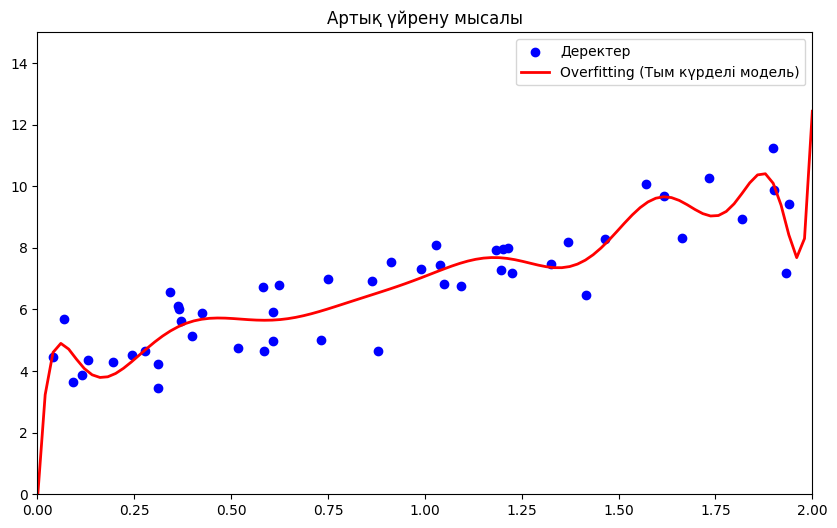

In [11]:
# Бұл ұяшықты жай ғана іске қосыңыз (RUN)

# 15-дәрежелі полиномдық белгілер жасау
poly = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly.fit_transform(X)

# Жай сызықтық регрессияны осы күрделі белгілерге үйрету
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

# График сызу үшін
X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Деректер')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Overfitting (Тым күрделі модель)')
plt.axis([0, 2, 0, 15])
plt.title("Артық үйрену мысалы")
plt.legend()
plt.show()

## 5. Ridge Регрессия (Регуляризация)

**Теория:**
Жоғарыдағы графикте көргеніңіздей, сызық қатты құбылып кетті. Бұл $w$ коэффициенттерінің тым үлкен болып кетуінен болады.

**Ridge Регрессия** қателік формуласына "айыппұл" қосады:
$$Loss = MSE + \alpha \sum w^2$$

Бұл модельді қарапайым болуға мәжбүрлейді. $\alpha$ (alpha) параметрі неғұрлым үлкен болса, сызық соғұрлым тегіс болады.

**Тапсырма:**
1.  `Ridge` моделін құрыңыз (`alpha=1` деп алыңыз).
2.  Оны жоғарыдағы `X_poly` және `y` деректеріне үйретіңіз.
3.  Нәтиженің қалай өзгергенін төмендегі дайын графиктен көріңіз.

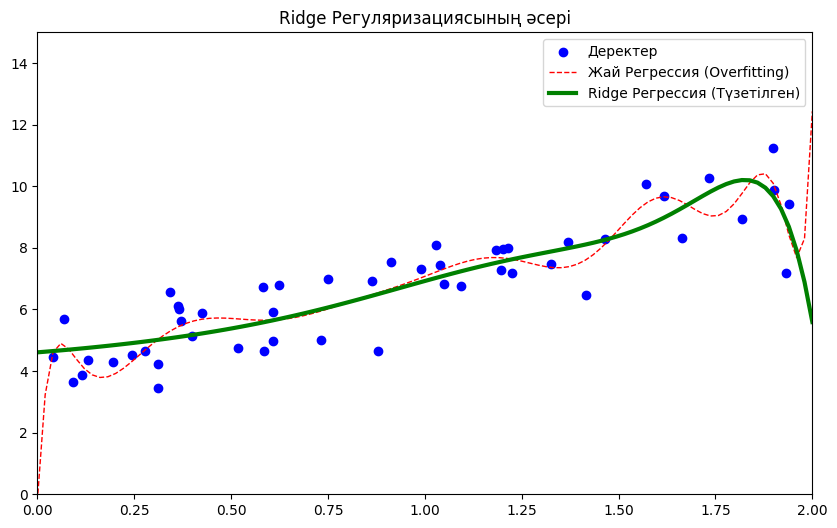

Жай регрессияның ең үлкен коэффициенті: 6279157.373679061
Ridge регрессияның ең үлкен коэффициенті: 1.011697260273131


In [14]:
# 1. Ridge моделін құру (alpha=1)
ridge_reg = Ridge(alpha=1)
# 2. Модельді үйрету (fit) X_poly және y қолданыңыз

ridge_reg.fit(X_poly, y)

# 3. Болжам жасау (График үшін)
y_new_ridge = ridge_reg.predict(X_new_poly)

# Нәтижені салыстыру (Кодты өзгертпеңіз)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Деректер')
plt.plot(X_new, y_new, 'r--', linewidth=1, label='Жай Регрессия (Overfitting)')
# Егер y_new_ridge дұрыс есептелсе, ол жасыл түспен шығады
try:
    plt.plot(X_new, y_new_ridge, 'g-', linewidth=3, label='Ridge Регрессия (Түзетілген)')
except NameError:
    print("Ridge моделі дұрыс құрылмады!")

plt.axis([0, 2, 0, 15])
plt.title("Ridge Регуляризациясының әсері")
plt.legend()
plt.show()

# Коэффициенттерді салыстыру
print("Жай регрессияның ең үлкен коэффициенті:", np.max(np.abs(lin_reg_poly.coef_)))
try:
    print("Ridge регрессияның ең үлкен коэффициенті:", np.max(np.abs(ridge_reg.coef_)))
except:
    pass

## Қорытынды

**Тексеру сұрақтары:**
1.  Деректерді не үшін Train және Test деп бөлеміз?
2.  Overfitting болғанда модель Train деректерінде жақсы жұмыс істей ме, әлде Test деректерінде ме?
3.  Ridge регрессиясы модельді күрделендіре ме, әлде қарапайым ете ме?

**Жарайсыз!** Сіз алғашқы ML модельдеріңізді жасап, олардың жұмысын реттеуді үйрендіңіз.

1.трэйн арқылы модель деректерді үйренеді сосын тест арқылы соны тексереді қаншалықты дұрыс жасайтындығын

2.трэйн да жақсы жұмыс жасап тестте нашар себебі көп шумды және артық заңдылық қабылдап шынайы жауап беруін қиындатады


3.модельді қарапайым етеді себебі ridge қолдану арқылы оверфиттинг азайтады